# Project 6

In addition to answering the bolded questions on Coursera, also attach your notebook, both as
`.ipynb` and `.html`.

In the following exercise, we will perform model selection to find the best model for two datasets.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.


<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please do it below!

In [1]:
# %%capture
# !pip install penngrader --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [2]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 42294124                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Katrina Shih"     # YOUR FULL NAME GOES HERE

In [3]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW6', student_id = STUDENT_ID)

## Part A

First, we will run multiple linear regression on the Auto dataset and use subset selection to find the best model. This dataset contains the following nine columns from 392 cars:

|Column|Description|
|:-|:-|
|mpg| continuous|
|cylinders| multi-valued discrete|
|displacement| continuous|
|horsepower| continuous|
|weight| continuous|
|acceleration| continuous|
|model year| multi-valued discrete|
|origin| multi-valued discrete|
|car name| string|

In [4]:
# Feel free to import your own libraries!
import pandas as pd

import numpy as np
import seaborn as sns

# ML
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Evaluation Metrics
from sklearn.metrics import mean_squared_error

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
auto_data_raw = pd.read_csv("Auto.csv")
auto = auto_data_raw.copy()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


1. Produce a scatter plot matrix which includes all the variables in the dataset. Comment on your observations. Are there any variables in particular which seem to be strongly correlated? Store your observation in `observed` as one string. If you do not get full credit for your observations, try to keep adding more comments.

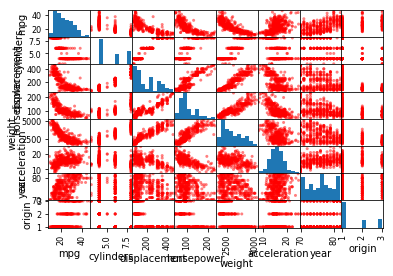

In [6]:
# Add your codes here
axes = pd.plotting.scatter_matrix(auto, color="red")
observed = "horsepower and weight seem to have strong positive correlation. mpg seems to negative correlation with displacement, weight, and horsepower."

In [7]:
grader.grade(test_case_id = 'test_correlation_obs', answer = observed)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Compute a matrix of correlations between the variables using the `pandas` and `corr()` functions.

In [8]:
# Add your comments here

auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


3. Using `Stats Models`, perform linear regression with 'mpg' as the response variable and all other variables except 'name' as predictors. Print the results of your regression analysis. Please answer the following questions based on your model.

    - <b>Which predictors appear to have a statistically signiﬁcant relationship with the response variable at a  $95\%$ confidence level?</b> Please store them in <b>significant_predictor</b> as a list of strings.
    - <b>What does the coeﬃcient for the ‘year’ variable suggest?</b> Comment on your observations and store your findings in `year_coef` as a single string. If you do not get full credit for your observations, try to keep adding more comments.

In [72]:
# Add your codes here
fit = smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin',data = auto).fit()
print(fit.summary())

year_coef = "The coefficient for the 'year' variable The coefficient for the 'year' variable in the regression analysis indicates a positive relationship with the 'mpg' (miles per gallon) variable. This implies that as the year of the vehicle increases, there tends to be a corresponding increase in miles per gallon. In other words, newer vehicles are typically associated with higher fuel efficiency, as reflected by this positive coefficient. indicates that as the year increases, there tends to be an increase in miles per gallon, implying that newer vehicles tend to have better fuel efficiency."
significant_predictor = ['displacement', 'weight', 'year', 'origin']


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          2.04e-139
Time:                        23:38:50   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [17]:
grader.grade(test_case_id = 'test_sig_predictor', answer = significant_predictor)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [18]:
grader.grade(test_case_id = 'test_year_ob', answer = year_coef)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. Select the optimal model by manually performing forward stepwise selection. The goal of this exercise is to show the sheer number of models needed for forward stepwise selection. To do this, first split the dataset into a training set and a test set, with a `test_size` of $20\%$ and `random_state = 42`. It is important to only use the training set to train the model. You may use the `processSubset` function from the recitation, but you should at least run 3 iterations of forward stepwise selection manually, as we wish to see each step of forward stepwise selection. 

First, run linear regression with one variable. Select the best model using training RSS as the performance metric. Using that first variable, continue adding variables, one at a time, until your linear model includes all of the variables. Afterwards, calculate the test RSS of all your models and select the one that <b>minimizes</b> test RSS. *Hint*: You can use the result of linear regression from `Stats Models` to calculate RSS by looking at the sum of the squared residuals. 

Store the listed models <b>for each round of selection</b> within `chosen_models`. Store your list of selected variables within <b>predictors_forward</b>. <b> Please do not capitalize your column names</b>. 

*Hint*: 
1. Your `chosen_models` should be of size 1*7, the first model has two coefficients(intercept and a predictor), and the last model has 8 coefficients(intercept and the entire predictor space).
2. Find the RSS for each of your chosen models. Choose the model with the least RSS as your selected model.

In [25]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
train, test = train_test_split(auto.drop(columns=['name']), test_size=0.2)

def find_best_model(train, initial_formula):
    models_rss = []
    for col in train.columns.drop(['mpg']):
        formula = f'{initial_formula}+{col}' if initial_formula else f'mpg~{col}'
        fit = smf.ols(formula, data=train).fit()
        rss = sum(fit.resid ** 2)
        models_rss.append((fit, rss, col))
    
    min_rss_model = min(models_rss, key=lambda x: x[1])
    return min_rss_model

initial_formula = ''
chosen_models = []
variables_in_model = set(['mpg'])  # Assuming 'mpg' is your target variable

for _ in range(1, len(train.columns)):
    best_model, min_rss, best_col = find_best_model(train, initial_formula)
    if best_col in variables_in_model:
        break  # Break the loop if no new variable improves the model
    variables_in_model.add(best_col)
    chosen_models.append(best_model)
    initial_formula += '+' + best_col if initial_formula else f'mpg~{best_col}'

if chosen_models:
    print(chosen_models[-1].params.index)
else:
    print("No model was chosen.")

Index(['Intercept', 'weight', 'year', 'origin', 'horsepower', 'displacement',
       'cylinders', 'acceleration'],
      dtype='object')


In [26]:
# Add your codes here
predictors_forward = ['weight', 'year']

In [27]:
# Please do not change the code below
chosen_models_params = [x.params for x in chosen_models]

In [28]:
grader.grade(test_case_id = 'test_chosen_models', answer = list(chosen_models_params))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [29]:
grader.grade(test_case_id = 'test_forward_selection', answer = predictors_forward)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Using the full dataset, fit a linear regression model with interaction eﬀects between 'displacement', 'weight', 'year', and 'origin'. Do any interactions appear to be statistically signiﬁcant? *Hint*: In addition to the full model with all seven predictors, your model should include six more interaction terms. List your list of significant interaction terms in <b>predictor_interaction</b> in alphabetical order.

*Hint*: 
1. Only store the interaction terms, your output format should be ["a:b","a:c"...].
2. Manually create a list of interaction terms first and then use '+'.join(list) to build your model.

In [35]:
# Add your codes here
# Create interaction terms directly within the DataFrame
auto['displacement_weight'] = auto['displacement'] * auto['weight']
auto['displacement_year'] = auto['displacement'] * auto['year']
auto['displacement_origin'] = auto['displacement'] * auto['origin']
auto['weight_origin'] = auto['weight'] * auto['origin']
auto['weight_year'] = auto['weight'] * auto['year']
auto['year_origin'] = auto['year'] * auto['origin']

# Build the formula string including all predictors and their interactions
predictors = ["cylinders", "displacement", "horsepower", "weight", 
              "acceleration", "year", "origin", "displacement_weight", 
              "displacement_year", "displacement_origin", "weight_origin", 
              "weight_year", "year_origin"]

# Joining all predictor names with a '+' to create the formula
formula = 'mpg ~ ' + ' + '.join(predictors)

# Fit the model
fit0 = smf.ols(formula, data=auto).fit()

# Display the summary
print(fit0.summary())

predictor_interaction = ["displacement:weight"]

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     195.5
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          9.21e-159
Time:                        23:28:13   Log-Likelihood:                -960.49
No. Observations:                 392   AIC:                             1949.
Df Residuals:                     378   BIC:                             2005.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -41.8056    

In [36]:
grader.grade(test_case_id = 'test_interactions', answer = predictor_interaction)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B

Next, we will use the College dataset to predict the number of applications ('Apps') received using the other variables in the College dataset. We will then use regularization to study their effects on our model. 

In [37]:
data = pd.read_csv('College.csv').copy()
data.set_index('Names', inplace = True)
data['Private'] = [1 if x=="Yes" else 0 for x in data['Private']]
data = data.rename(columns = {'Grad.Rate':'Grad_Rate',
                              'S.F.Ratio': 'S_F_Ratio',
                              'perc.alumni':'perc_alumni',
                              'Room.Board':'Room_Board',
                              'F.Undergrad':'F_Undergrad',
                              'P.Undergrad':'P_Undergrad'})
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


1. Split the dataset into a training set and a test set, with a `test_size` of $20\%$ and `random_state=1`.

In [38]:
# Add your codes here
np.random.seed(1)
train, test = train_test_split(data, test_size=0.2)

In [39]:
grader.grade(test_case_id = 'test_train_test_split', answer = test)

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Fit a linear model using `Stats Models` on the training set where the target variable is `Apps`, and report the test MSE obtained. Name this variable `test_MSE`.

In [40]:
# Add your codes here
model = LinearRegression(fit_intercept=True)
model.fit(train.drop(['Apps'], axis=1), train['Apps'])
predictions = model.predict(test.drop( ['Apps'], axis=1))

test_MSE = mean_squared_error(test['Apps'], predictions)
test_MSE

640045.027906143

In [41]:
grader.grade(test_case_id = 'test_MSE', answer = test_MSE)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. What is the MSE if you fit a ridge regression with a $\lambda$ parameter of 0? Store your answer in <b>ridge_lambda_0</b>. 
*Hint*: you can either take an informed guess and hard code your answer!

In [63]:
# Add your codes here
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
np.random.seed(1)
train, test = train_test_split(data, test_size=0.2)


alphas = 10**np.linspace(2,3,50)
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(data.drop(['Apps'], axis=1), data['Apps'])
    coefs.append(ridge.coef_)
    
np.shape(coefs)

ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(train.drop(['Apps'], axis=1), train['Apps'])             
predictions = ridge2.predict(test.drop( ['Apps'], axis=1))           

ridge_lambda_0 = mean_squared_error(test['Apps'], predictions)
ridge_lambda_0

640045.0279061516

In [64]:
grader.grade(test_case_id = 'test_ridge_lambda_0', answer = ridge_lambda_0)

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained. *Hint*: Look at the recitation guides for how to implement cross-validation with `RidgeCV`. `RidgeCV` essentially performs hyper-parameter optimization (more on this in the next recitation) by testing all possible parameters through cross validation. For its parameters, specify `KFold cross validation` with ten folds, `scoring` with mean squared error, `normalization` set to true, and 50 equally spaced $\lambda$ values ranging from $10^2$ to $10^3$. Name the selected value of $\lambda$ as `ridge_select` and calculate the corresponding test MSE as `test_MSE_ridge`. 

*Hint*: Use np.linspace() to generate lambdas. Please refer to [sklearn.linear_model.ridgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) for ridgeCV's documentation.

In [73]:
# Add your codes here
# ridge_select = 
# test_MSE_ridge = 
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(train.drop(['Apps'], axis=1), train['Apps'])
ridgecv.alpha_

ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(train.drop(['Apps'], axis=1), train['Apps'])




ridge_select = ridgecv.alpha_
test_MSE_ridge = mean_squared_error(test['Apps'], ridge4.predict(test.drop( ['Apps'], axis=1)))
test_MSE_ridge
# Add your codes here
# ridge_select = 
# test_MSE_ridge = 
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(train.drop(['Apps'], axis=1), train['Apps'])
ridgecv.alpha_

ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(train.drop(['Apps'], axis=1), train['Apps'])




ridge_select = ridgecv.alpha_
test_MSE_ridge = mean_squared_error(test['Apps'], ridge4.predict(test.drop( ['Apps'], axis=1)))
test_MSE_ridge
# ridge_select

100.0

In [66]:
grader.grade(test_case_id = 'test_ridgeCV', answer = (ridge_select, test_MSE_ridge))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Compare the ridge regression coefficients when using $\lambda = 0$ and the value for $\lambda$ given by `RidgeCV`. Comment on your observations.

In [ ]:
#  The case where lambda equals zero exhibits a lower Mean Squared Error (MSE) compared to the lambda determined through cross-validation.

6. Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Specify `KFold cross validation` with ten folds, `normalization` set to true, and 50 equally spaced $\lambda$ values ranging from $10^2$ to $10^3$. Name the selected value of $\lambda$ as `lasso_select` and calculate the corresponding test MSE as `test_MSE_lasso`. Also report the number of <b>non-zero</b> coefficient estimates by looking at the output of 
```Python
pd.Series(lasso.coef_,index=x.columns)
```
and store your answer in `num_nonzero`

In [67]:
# Add your codes here
alphas = 10**np.linspace(2,3,50)

model = LassoCV(alphas=alphas, normalize=True, cv=10)
model.fit(train.drop(['Apps'], axis=1), train['Apps'])

predictions = model.predict(test.drop(['Apps'], axis=1))
print("Test Error: " +str(mean_squared_error(test['Apps'], predictions)))
print("Number of Non-zero coefficients: " + str(len(model.coef_)))


lasso_select = model.alpha_
test_MSE_lasso = mean_squared_error(test['Apps'], predictions)
num_nonzero = 1

Test Error: 6685061.618833576
Number of Non-zero coefficients: 17


In [68]:
grader.grade(test_case_id = 'test_lassoCV', answer = (lasso_select, test_MSE_lasso))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [69]:
grader.grade(test_case_id = 'test_lasso_nonzero', answer = num_nonzero)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


7. Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much diﬀerence among the test errors resulting from these three approaches? 

After commenting on your observations, please answer following questions:
- In ridge regression, what will be the effect on coefficients if we have an infinitely large $\lambda$ compared to OLS:

    A. same coefficient values
    
    B. coefficients will shrink close to zero but not equal to zero
    
    C. some coefficients will shrink to zero
    
    D. all coefficients equal to zero 


- Assume the model complexity remains unchanged, what is the effect of increasing $\lambda$ using ridge and lasso regressions:

    A. Increasing bias and increasing variance
    
    B. Decreasing bias and decreasing variance 
    
    C. Increasing bias and decreasing variance
    
    D. Decreasing bias and increasing variance
    
    E. None of the above 

Please enter your answer in `answers` as a list of characters, (['F','F'])

In [70]:
# Add your comments and choises here
# Add your comments and choises here
answers = ['B', 'C']

In [71]:
grader.grade(test_case_id = 'test_regu_ob', answer = answers)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
